In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
happy16=pd.DataFrame(pd.read_csv('CSVs/Happiness_2016.csv'))
daly_drug=pd.DataFrame(pd.read_csv('CSVs/dalys-rate-from-alcohol-and-drug-use-disorders (1).csv'))
daly_drug.head()

,Entity,Code,Year,"DALYs (Disability-Adjusted Life Years) - Alcohol and substance use disorders (Age-standardized rate) (DALYs per 100,000)"
0,Afghanistan,AFG,1990,416.259106
1,Afghanistan,AFG,1991,417.435138
2,Afghanistan,AFG,1992,418.971615
3,Afghanistan,AFG,1993,419.745435
4,Afghanistan,AFG,1994,423.018937


In [3]:
daly_drug=daly_drug[daly_drug['Year']==2016]
daly_da=daly_drug.rename(columns={'Entity':'Country',
                                  'DALYs (Disability-Adjusted Life Years) - Alcohol and substance use disorders (Age-standardized rate) (DALYs per 100,000)':
                                  'DALY(Drug & Alcohol) per 100,000'})
daly_da=daly_da[['Country','DALY(Drug & Alcohol) per 100,000']]
daly_da.head()

,Country,"DALY(Drug & Alcohol) per 100,000"
26,Afghanistan,535.558519
53,Albania,318.075945
80,Algeria,375.689242
107,American Samoa,249.329290
134,Andean Latin America,413.432700


In [4]:
country_happy16=happy16[['Country','Happiness Score']]
country_happy16.head()

,Country,Happiness Score
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [5]:
happy_drug = pd.merge(country_happy16, daly_da, on='Country', how='inner')
happy_drug = happy_drug.replace(r'^\s*$', np.nan, regex=True)
happy_drug = happy_drug.dropna(how='any')
len(happy_drug)

149

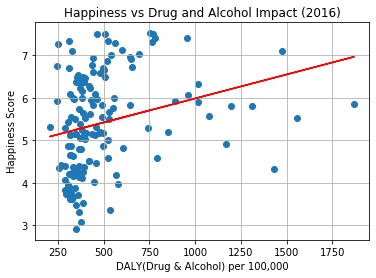

R-value: 0.26401029367737555, P-value: 0.0011401745732118134


In [9]:
#Linear Regression!
y_values=happy_drug['Happiness Score']
x_values=happy_drug['DALY(Drug & Alcohol) per 100,000']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Drug and Alcohol Impact (2016)')
plt.xlabel('DALY(Drug & Alcohol) per 100,000')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(1.5,4),fontsize=15,color="red")
plt.annotate(r_value,(1.5,3.75),fontsize=12,color="red")
plt.annotate(p_value,(1.5,3.5),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/drugs.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [7]:
#Weak correlation!
len(happy_drug)

149